In [2]:
# 최소제곱법
import numpy as np
x = [2,4,6,8]
y = [81,93,91,97]

mx = np.mean(x)
my = np.mean(y)

divisor = sum([(i - mx)**2 for i in x])

def top(x, mx, y, my):
    d = 0
    for i in range(len(x)):
        d += (x[i] - mx) * (y[i] - my)
    return d

dividend = top(x, mx, y, my)

a = dividend / divisor
b = my - mx*a

print("y = ", a, "x + ", b)

y =  2.3 x +  79.0


In [4]:
# MSE
fake_a_b = [3,76]
data = [[2,81],[4,93],[6,91],[8,97]]
x = [i[0] for i in data]
y = [i[1] for i in data]

def predict(x):
    return fake_a_b[0]*x + fake_a_b[1]

def mse(y_hat, y):
    return((y_hat - y)**2).mean()

def mse_val(predict_result, y):
    return mse(np.array(predict_result), np.array(y))

predict_result = []

for i in range(len(x)):
    predict_result.append(predict(x[i]))
    print("공부시간=%.f, 실제점수=%.f, 예측점수=%.f" % (x[i], y[i], predict(x[i])))

print("mse" + str(mse_val(predict_result, y)))

공부시간=2, 실제점수=81, 예측점수=82
공부시간=4, 실제점수=93, 예측점수=88
공부시간=6, 실제점수=91, 예측점수=94
공부시간=8, 실제점수=97, 예측점수=100
mse11.0


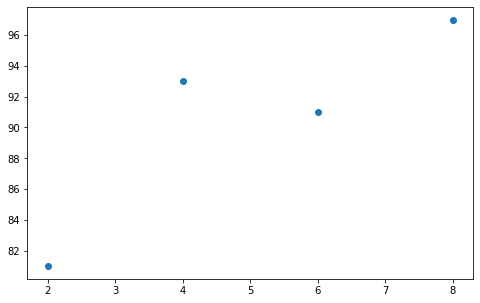

epoch=0, 기울기=23.2000, 절편=4.5250


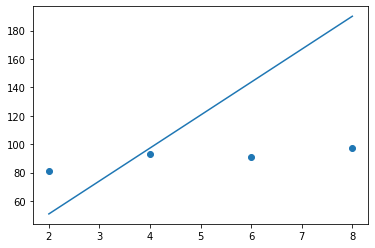

epoch=500, 기울기=2.5171, 절편=77.7047


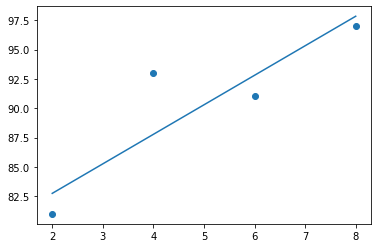

epoch=1000, 기울기=2.3037, 절편=78.9779


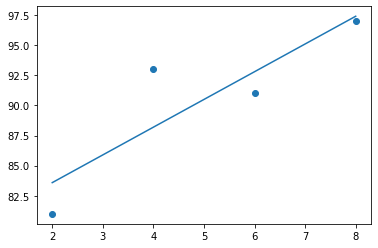

epoch=1500, 기울기=2.3001, 절편=78.9996


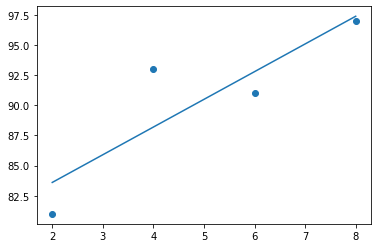

epoch=2000, 기울기=2.3000, 절편=79.0000


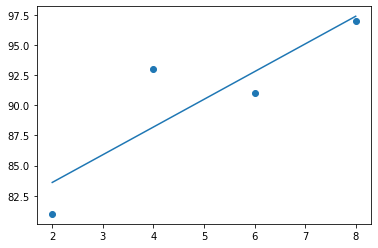

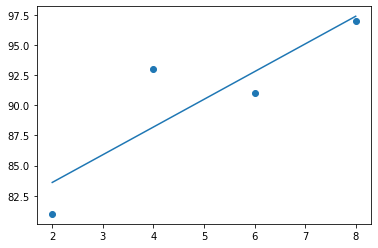

In [8]:
# 경사하강법
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data = [[2,81],[4,93],[6,91],[8,97]]
x = [i[0] for i in data]
y = [i[1] for i in data]

plt.figure(figsize=(8,5))
plt.scatter(x, y)
plt.show()

x_data = np.array(x)
y_data = np.array(y)

a = 0
b = 0

lr = 0.05

epochs = 2001

for i in range(epochs):
    y_pred = a*x_data+b
    error = y_data - y_pred
    
    a_diff = -(1/len(x_data)) * sum(x_data * error)
    b_diff = -(1/len(x_data)) * sum(error)
    
    a = a - lr*a_diff
    b = b - lr*b_diff
    
    if i%500 == 0:
        print("epoch=%.f, 기울기=%.04f, 절편=%.04f" %(i, a, b))
        y_pred = a*x_data + b
        plt.scatter(x, y)
        plt.plot([min(x_data), max(x_data)], [min(y_pred), max(y_pred)])
        plt.show()

y_pred = a*x_data + b
plt.scatter(x, y)
plt.plot([min(x_data), max(x_data)], [min(y_pred), max(y_pred)])
plt.show()

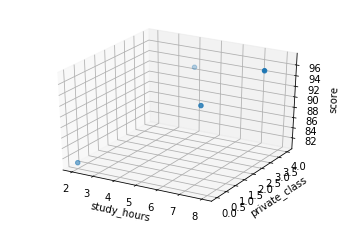

epoch=0, 기울기1=23.2000, 기울기2=10.5625, 절편=4.5250
공부시간=2, 실제점수=81, 예측점수=0
공부시간=4, 실제점수=93, 예측점수=0
공부시간=6, 실제점수=91, 예측점수=0
공부시간=8, 실제점수=97, 예측점수=0
mse8225.0
epoch=500, 기울기1=1.7042, 기울기2=2.3562, 절편=76.4554
공부시간=2, 실제점수=81, 예측점수=80
공부시간=4, 실제점수=93, 예측점수=93
공부시간=6, 실제점수=91, 예측점수=91
공부시간=8, 실제점수=97, 예측점수=97
mse0.3956270471584856
epoch=1000, 기울기1=1.5038, 기울기2=2.2870, 절편=77.8310
공부시간=2, 실제점수=81, 예측점수=81
공부시간=4, 실제점수=93, 예측점수=93
공부시간=6, 실제점수=91, 예측점수=91
공부시간=8, 실제점수=97, 예측점수=97
mse0.07154143919102608
epoch=1500, 기울기1=1.5001, 기울기2=2.2857, 절편=77.8567
공부시간=2, 실제점수=81, 예측점수=81
공부시간=4, 실제점수=93, 예측점수=93
공부시간=6, 실제점수=91, 예측점수=91
공부시간=8, 실제점수=97, 예측점수=97
mse0.07142861072280964
epoch=2000, 기울기1=1.5000, 기울기2=2.2857, 절편=77.8571
공부시간=2, 실제점수=81, 예측점수=81
공부시간=4, 실제점수=93, 예측점수=93
공부시간=6, 실제점수=91, 예측점수=91
공부시간=8, 실제점수=97, 예측점수=97
mse0.07142857144225148


In [11]:
# 다중선형회귀
# 경사하강법
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

data = [[2,0,81],[4,4,93],[6,2,91],[8,3,97]]
x1 = [i[0] for i in data]
x2 = [i[1] for i in data]
y = [i[2] for i in data]

ax = plt.axes(projection='3d')
ax.set_xlabel("study_hours")
ax.set_ylabel("private_class")
ax.set_zlabel("score")
ax.dist = 11
ax.scatter(x1,x2,y)
plt.show()

x1_data = np.array(x1)
x2_data = np.array(x2)
y_data = np.array(y)

a1 = 0
a2 = 0
b = 0

lr = 0.05

epochs = 2001

for i in range(epochs):
    y_pred = a1*x1_data + a2*x2_data + b
    error = y_data - y_pred
    
    a1_diff = -(1/len(x1_data)) * sum(x1_data * error)
    a2_diff = -(1/len(x2_data)) * sum(x2_data * error)
    b_diff = -(1/len(x1_data)) * sum(error)
    
    a1 = a1 - lr*a1_diff
    a2 = a2 - lr*a2_diff
    b = b - lr*b_diff
    
    if i%500 == 0:
        print("epoch=%.f, 기울기1=%.04f, 기울기2=%.04f, 절편=%.04f" %(i, a1, a2, b))
        predict_result = []
        for i in range(len(x1_data)):
            predict_result.append(y_pred)
            print("공부시간=%.f, 실제점수=%.f, 예측점수=%.f" % (x[i], y[i], y_pred[i]))
        print("mse" + str(mse_val(predict_result, y_data)))



epoch=0, 기울기=-0.0500, 절편=-0.0250


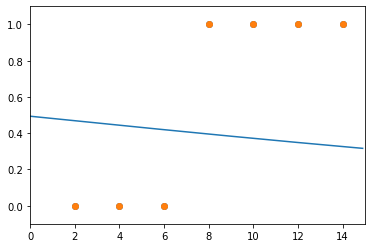

epoch=0, 기울기=-0.1388, 절편=-0.0472


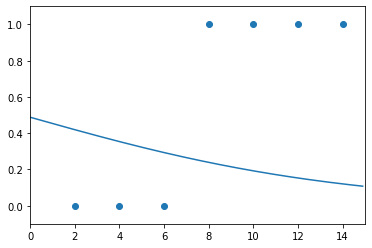

epoch=0, 기울기=-0.2268, 절편=-0.0619


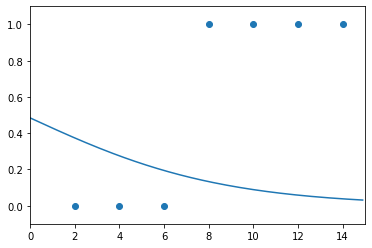

epoch=0, 기울기=0.1201, 절편=-0.0185


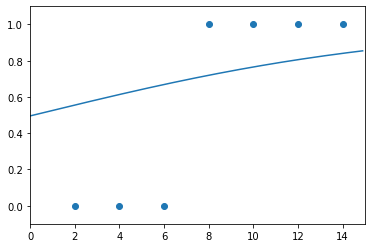

epoch=0, 기울기=0.2374, 절편=-0.0068


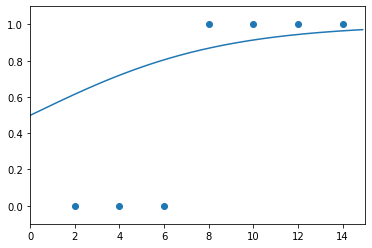

epoch=0, 기울기=0.2705, 절편=-0.0040


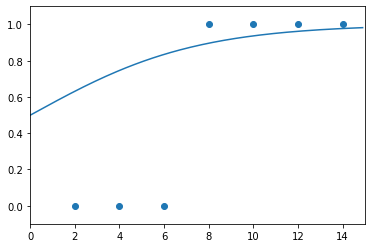

epoch=0, 기울기=0.2860, 절편=-0.0029


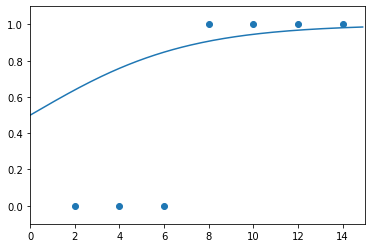

epoch=1000, 기울기=1.4978, 절편=-9.9401


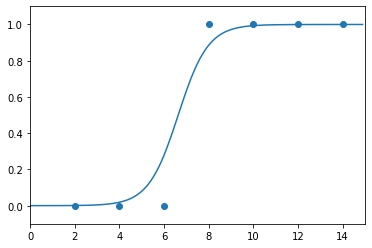

epoch=1000, 기울기=1.4940, 절편=-9.9411


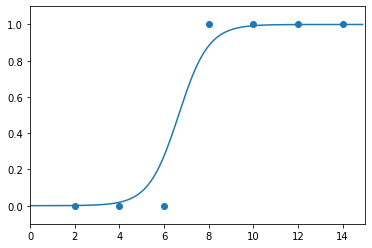

epoch=1000, 기울기=1.4120, 절편=-9.9547


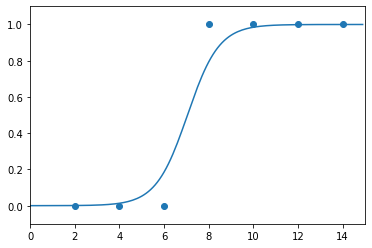

epoch=1000, 기울기=1.4949, 절편=-9.9444


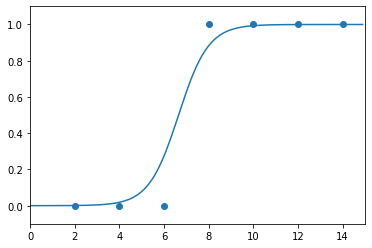

epoch=1000, 기울기=1.4982, 절편=-9.9440


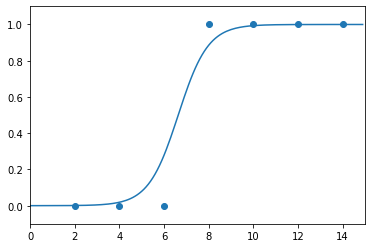

epoch=1000, 기울기=1.4984, 절편=-9.9440


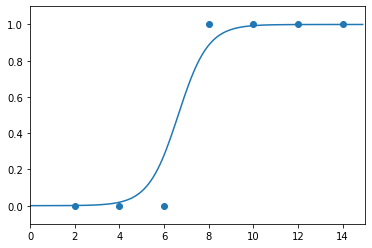

epoch=1000, 기울기=1.4985, 절편=-9.9440


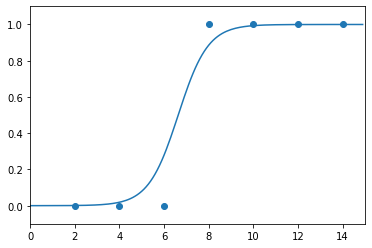

epoch=2000, 기울기=1.9065, 절편=-12.9489


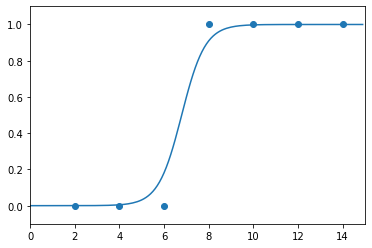

epoch=2000, 기울기=1.9055, 절편=-12.9491


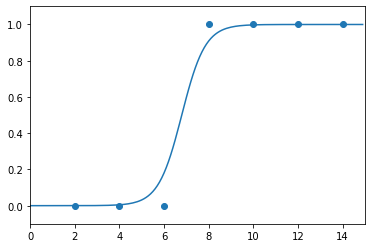

epoch=2000, 기울기=1.8515, 절편=-12.9581


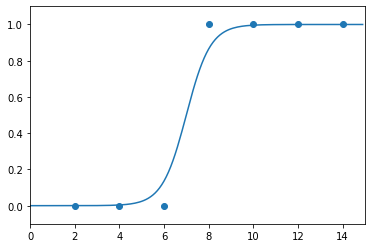

epoch=2000, 기울기=1.9057, 절편=-12.9514


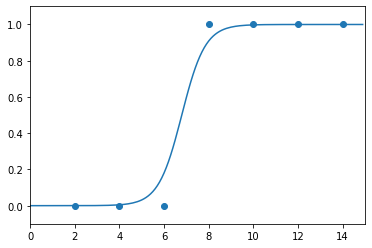

epoch=2000, 기울기=1.9068, 절편=-12.9513


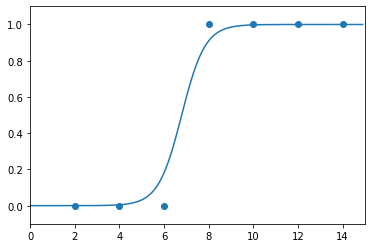

epoch=2000, 기울기=1.9068, 절편=-12.9513


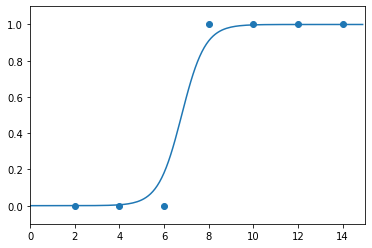

epoch=2000, 기울기=1.9068, 절편=-12.9513


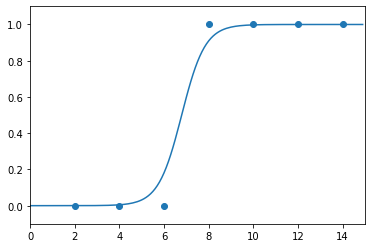

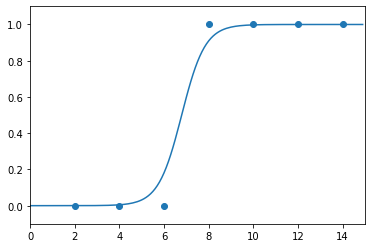

In [13]:
# 로지스틱 회귀
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data = [[2,0],[4,0],[6,0],[8,1],[10,1],[12,1],[14,1]]

x_data = [i[0] for i in data]
y_data = [i[1] for i in data]

plt.scatter(x_data, y_data)
plt.xlim(0,15)
plt.ylim(-0.1,1.1)

a = 0
b = 0

lr = 0.05

def sigmoid(x):
    return 1/(1+np.e**(-x))


for i in range(2001):
    for x_data, y_data in data:
        a_diff = x_data*(sigmoid(a*x_data+b) - y_data)
        b_diff = sigmoid(a*x_data+b) - y_data
        a = a - lr*a_diff
        b = b - lr*b_diff
        if i%1000 == 0:
            print("epoch=%.f, 기울기=%.04f, 절편=%.04f" % (i, a, b))
            x_data = [i[0] for i in data]
            y_data = [i[1] for i in data]
            plt.scatter(x_data, y_data)
            plt.xlim(0,15)
            plt.ylim(-0.1,1.1)
            x_range = (np.arange(0,15,0.1))
            plt.plot(np.arange(0,15,0.1), np.array([sigmoid(a*x+b) for x in x_range]))
            plt.show()

plt.scatter(x_data, y_data)
plt.xlim(0,15)
plt.ylim(-0.1,1.1)
x_range = (np.arange(0,15,0.1))
plt.plot(np.arange(0,15,0.1), np.array([sigmoid(a*x+b) for x in x_range]))
plt.show()    